In [2]:
import numpy as np
import pandas as pd
import gc
import math
import os.path
import time
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm
import copy
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet
import warnings
import datetime
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [5]:
data_path = './Datasets'
train_x_df = pd.read_csv(data_path  + "/train_x_df.csv")
train_y_df = pd.read_csv(data_path  + "/train_y_df.csv")
test_x_df = pd.read_csv(data_path  + "/test_x_df.csv")

In [74]:
8.305119e+05

830511.9

In [75]:
8.305119e+05/137

6062.130656934307

In [73]:
train_y_df.head(15)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.000392,1.000588,1.000392,1.000588,8.305119e+05,42356.179688,137.308746,8.305119e+05,42356.179688
1,0,1,7,1.000588,1.001177,1.000392,1.001177,5.320066e+05,27140.638672,294.233032,4.882738e+05,24909.861328
2,0,2,7,1.001177,1.001177,1.001177,1.001177,5.113770e+05,26100.681641,58.846603,5.113770e+05,26100.681641
3,0,3,7,1.001177,1.001373,1.001177,1.001373,1.134853e+06,57929.410156,137.308746,1.095514e+06,55921.156250
4,0,4,7,1.000981,1.000981,0.999804,1.000196,5.801173e+06,295872.343750,666.928162,9.911239e+05,50528.589844
5,0,5,7,1.000196,1.000196,0.999215,0.999215,1.173234e+07,597972.125000,1000.392273,9.602350e+06,489444.593750
6,0,6,7,0.999804,1.000196,0.999804,1.000196,8.071648e+06,411537.437500,451.157288,7.246620e+06,369485.812500
7,0,7,7,1.000196,1.000196,0.998431,0.999411,8.704294e+06,443386.625000,686.543701,1.935653e+06,98695.015625
8,0,8,7,0.999019,0.999804,0.998823,0.999411,2.429816e+05,12374.450195,117.693207,2.535504e+04,1292.153931
9,0,9,7,0.999411,0.999608,0.998627,0.999215,1.062364e+06,54117.152344,215.770889,6.478560e+05,33008.457031


In [89]:
train_y_df['sample'] = train_y_df.apply(lambda x: x['open'] * (x['volume'] / x['trades']), axis=1)

In [90]:
train_y_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,sample
0,0,0,7,1.000392,1.000588,1.000392,1.000588,8.305119e+05,42356.179688,137.308746,8.305119e+05,42356.179688,6050.872827
1,0,1,7,1.000588,1.001177,1.000392,1.001177,5.320066e+05,27140.638672,294.233032,4.882738e+05,24909.861328,1809.177110
2,0,2,7,1.001177,1.001177,1.001177,1.001177,5.113770e+05,26100.681641,58.846603,5.113770e+05,26100.681641,8700.228005
3,0,3,7,1.001177,1.001373,1.001177,1.001373,1.134853e+06,57929.410156,137.308746,1.095514e+06,55921.156250,8274.698984
4,0,4,7,1.000981,1.000981,0.999804,1.000196,5.801173e+06,295872.343750,666.928162,9.911239e+05,50528.589844,8706.878411


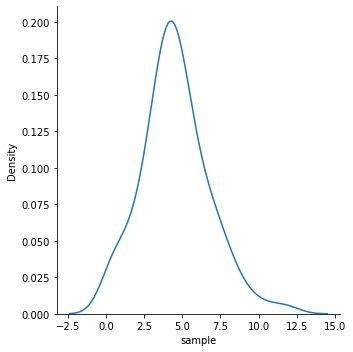

In [98]:
import seaborn as sns

sns.displot(train_y_df.loc[train_y_df['sample_id']==10]['sample'], kind='kde')

In [64]:
(1.009808*39.231071)/(313.848572)

0.12622599839124965

In [65]:
2.5e+3

2500.0

In [61]:
1.0098 * (39/313)

0.1258217252396166

In [62]:
1.0098 * (451/313)

1.4550153354632587

In [ ]:
# 건바이량 = 거래량 / 거래 건수



In [58]:
train_x_df.groupby('sample_id')['trades'].last()

sample_id
0       313.848572
1         3.147624
2        42.599419
3       257.746399
4         0.033450
           ...    
7357      0.152213
7358      0.026188
7359      0.132714
7360      4.386314
7361      0.642631
Name: trades, Length: 7362, dtype: float64

In [6]:
def df2d_to_array3d(df_2d):
    # 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    sample_index = df_2d.sample_id.value_counts().index
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

In [7]:
train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
test_x_array = df2d_to_array3d(test_x_df)

In [8]:
print(train_x_array.shape)

(7362, 1380, 10)


In [9]:
def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

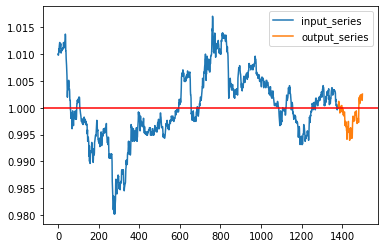

In [77]:
idx = 0
plot_series(train_x_array[idx,:,1], train_y_array[idx,:,1])
plt.show()

In [11]:
start_time = '2021-01-31 00:00:00'
start_dt = datetime.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')

In [12]:
idx = 1121
# train data 중 sample_id 1121에 해당하는 x_series로 arima 모델을 학습한 후
# y_sereis를 추론
x_series = train_x_array[idx,:,1]
y_series = train_y_array[idx,:,1]

In [13]:
x_df = pd.DataFrame()
x_df['ds'] = [start_dt + datetime.timedelta(minutes = time_min) for time_min in np.arange(1, x_series.shape[0]+1).tolist()]
x_df['y'] = x_series.tolist()

In [14]:
x_df.head()

,ds,y
0,2021-01-31 00:01:00,1.024379
1,2021-01-31 00:02:00,1.024140
2,2021-01-31 00:03:00,1.023901
3,2021-01-31 00:04:00,1.024140
4,2021-01-31 00:05:00,1.024618


In [15]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=False,
                  weekly_seasonality=False, daily_seasonality=False)
prophet.fit(x_df)

In [16]:
future_data = prophet.make_future_dataframe(periods=120, freq='min')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1495,2021-02-01 00:56:00,0.999295,0.986173,1.012911
1496,2021-02-01 00:57:00,0.999263,0.985952,1.012935
1497,2021-02-01 00:58:00,0.999231,0.985559,1.013184
1498,2021-02-01 00:59:00,0.999199,0.985076,1.014237
1499,2021-02-01 01:00:00,0.999167,0.985181,1.013355


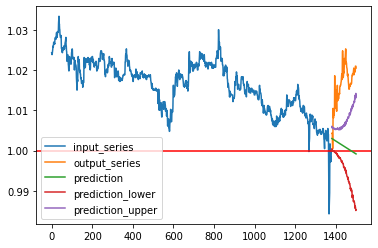

In [17]:
pred_y = forecast_data.yhat.values[-120:]
pred_y_lower = forecast_data.yhat_lower.values[-120:]
pred_y_upper = forecast_data.yhat_upper.values[-120:]

plot_series(x_series, y_series)
plt.plot(np.arange(1380, 1380+120), pred_y, label = 'prediction')
plt.plot(np.arange(1380, 1380+120), pred_y_lower, label = 'prediction_lower')
plt.plot(np.arange(1380, 1380+120), pred_y_upper, label = 'prediction_upper')
plt.legend()
plt.show()

In [21]:
# train 데이터 상단의 300개 샘플로 validation set를 구성하여 학습 및 추론
valid_x_df = train_x_df[train_x_df.sample_id < 10]
valid_y_df = train_y_df[train_y_df.sample_id < 10]

valid_x_array = df2d_to_array3d(valid_x_df)
valid_y_array = df2d_to_array3d(valid_y_df)
valid_pred_array = np.zeros([10, 120])

In [22]:
for idx in tqdm(range(valid_x_array.shape[0])):
    try:
        x_series = valid_x_array[idx,:,1]

        x_df = pd.DataFrame()
        x_df['ds'] = [start_dt + datetime.timedelta(minutes = time_min) for time_min in np.arange(1, x_series.shape[0]+1).tolist()]
        x_df['y'] = x_series.tolist()

        prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=False,
                  weekly_seasonality=False, daily_seasonality=False)
        prophet.fit(x_df)

        # 120분 테스트 데이터를 예측합니다.
        future_data = prophet.make_future_dataframe(periods=120, freq='min')
        forecast_data = prophet.predict(future_data)

        pred_y = forecast_data.yhat.values[-120:]
        pred_y_lower = forecast_data.yhat_lower.values[-120:]
        pred_y_upper = forecast_data.yhat_upper.values[-120:]

        valid_pred_array[idx,:] = pred_y
    except:
        print(idx, " 샘플은 수렴하지 않습니다.")
        pass

100%|██████████| 10/10 [00:17<00:00,  1.80s/it]


In [24]:
valid_pred_array.shape

(10, 120)

In [29]:
np.argmax(valid_pred_array[0])

119

In [53]:
valid_pred_array.shape

(10, 120)

In [32]:
def array_to_submission(pred_array):
    # 입력 x_arrry와 출력 pred_arry를 통해서 
    # buy_quantitiy와 sell_time을 결정
    submission = pd.DataFrame(np.zeros([pred_array.shape[0],2], np.int64),
                              columns = ['buy_quantity', 'sell_time'])
    submission = submission.reset_index()
    submission.loc[:, 'buy_quantity'] = 0.1
    
    buy_price = []
    for idx, sell_time in enumerate(np.argmax(pred_array, axis = 1)):
        buy_price.append(pred_array[idx, sell_time])
    buy_price = np.array(buy_price)
    # 115% 이상 상승한하고 예측한 sample에 대해서만 100% 매수
    submission.loc[:, 'buy_quantity'] = (buy_price > 1.15) * 1
    # 모델이 예측값 중 최대 값에 해당하는 시간에 매도
    submission['sell_time'] = np.argmax(pred_array, axis = 1)
    submission.columns = ['sample_id','buy_quantity', 'sell_time']
    return submission

In [33]:
valid_submission = array_to_submission(valid_pred_array)

In [34]:
valid_submission

,sample_id,buy_quantity,sell_time
0,0,0,119
1,1,0,0
2,2,0,0
3,3,0,119
4,4,0,0
5,5,0,0
6,6,0,119
7,7,0,119
8,8,0,0
9,9,0,119


In [30]:
valid_submission.buy_quantity.value_counts()

0    10
Name: buy_quantity, dtype: int64

In [35]:
def df2d_to_answer(df_2d):
    # valid_y_df로부터
    # open 가격 정보가 포함된
    # [샘플 수, 120분] 크기의 
    # 2차원 array를 반환하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    sample_index = df_2d.sample_id.value_counts().index
    array_2d = df_2d.open.values.reshape([sample_size, time_size])
    sample_index = list(sample_index)
    return array_2d, sample_index


def COIN(y_df, submission, df2d_to_answer = df2d_to_answer):
    # 2차원 데이터프레임에서 open 시점 데이터만 추출하여 array로 복원
    # sample_id정보를 index에 저장
    y_array, index = df2d_to_answer(y_df)
    
    # index 기준으로 submission을 다시 선택
    submission = submission.set_index(submission.columns[0])
    submission = submission.iloc[index, :]    
    
    # 초기 투자 비용은 10000 달러
    total_momey      = 10000 # dolors
    total_momey_list = []
    
    # 가장 처음 sample_id값
    start_index = submission.index[0]
    for row_idx in submission.index:
        sell_time  = submission.loc[row_idx, 'sell_time']
        buy_price  = y_array[row_idx - start_index, 0]
        sell_price = y_array[row_idx - start_index, sell_time]
        buy_quantity = submission.loc[row_idx, 'buy_quantity'] * total_momey
        residual = total_momey - buy_quantity
        ratio = sell_price / buy_price
        total_momey = buy_quantity * ratio * 0.9995 * 0.9995 + residual        
        total_momey_list.append(total_momey)
    return total_momey, total_momey_list

In [36]:
total_momey, total_momey_list = COIN(valid_y_df, valid_submission)

In [37]:
print(total_momey)

10000.0


In [43]:
valid_y_df.iloc[119:134]

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
119,0,119,7,1.002550,1.003138,1.002550,1.003138,453603.343750,23192.257812,255.001953,334046.656250,17079.324219
120,1,0,0,1.000504,1.000535,1.000504,1.000535,5.177841,16.458494,0.944287,5.177841,16.458494
121,1,1,0,0.999654,0.999654,0.999591,0.999591,74.331123,236.054169,2.832861,0.000000,0.000000
122,1,2,0,0.999559,0.999559,0.998332,0.999182,1432.489746,4546.403809,7.869059,704.135986,2234.468994
123,1,3,0,1.000441,1.000441,0.999780,0.999874,5.760151,18.300951,1.573812,5.760151,18.300951
124,1,4,0,0.999622,0.999622,0.998206,0.999119,64.249290,203.860489,4.721435,5.574441,17.698793
125,1,5,0,0.998741,0.999056,0.998458,0.998458,16.430595,52.127083,1.888574,2.008184,6.373774
126,1,6,0,0.998237,1.002109,0.998237,1.002077,2019.955933,6420.939941,20.774315,1266.531250,4027.583496
127,1,7,0,1.001951,1.010324,1.001889,1.008058,9383.858398,30033.445312,76.802010,5351.573730,17122.837891
128,1,8,0,1.007145,1.009821,1.004281,1.009821,2522.464600,8069.384277,30.846710,1817.431519,5814.579590


In [38]:
arr, idx = df2d_to_answer(valid_y_df)

In [42]:
arr

array([[1.00039232, 1.00058842, 1.00117695, ..., 1.00137305, 1.00137305,
        1.00255001],
       [1.00050366, 0.99965376, 0.99955934, ..., 1.02219069, 1.02077436,
        1.02005041],
       [1.0006603 , 1.00055373, 1.00042605, ..., 1.00347185, 1.00227916,
        1.00340796],
       ...,
       [0.99981707, 0.99992424, 0.99987584, ..., 0.99825883, 0.99642682,
        0.99784809],
       [0.99975771, 1.00003469, 0.99951547, ..., 0.99647027, 0.99591655,
        0.99480915],
       [1.00137532, 1.00248551, 1.00249374, ..., 0.9675228 , 0.96521956,
        0.97285002]])

In [44]:
valid_submission

NameError: name 'submission' is not defined

In [47]:
idx

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [49]:
def COIN(y_array, index, submission):
    # 2차원 데이터프레임에서 open 시점 데이터만 추출하여 array로 복원
    # sample_id정보를 index에 저장
    # index 기준으로 submission을 다시 선택
    submission = submission.set_index(submission.columns[0])
    submission = submission.iloc[index, :]    
    
    # 초기 투자 비용은 10000 달러
    total_momey      = 10000 # dolors
    total_momey_list = []
    
    # 가장 처음 sample_id값
    start_index = submission.index[0]
    for row_idx in submission.index:
        sell_time  = submission.loc[row_idx, 'sell_time']
        buy_price  = y_array[row_idx - start_index, 0]
        sell_price = y_array[row_idx - start_index, sell_time]
        buy_quantity = submission.loc[row_idx, 'buy_quantity'] * total_momey
        residual = total_momey - buy_quantity
        ratio = sell_price / buy_price
        total_momey = buy_quantity * ratio * 0.9995 * 0.9995 + residual        
        total_momey_list.append(total_momey)
        
    return total_momey, total_momey_list

In [50]:
COIN(arr, idx, valid_submission)

(10000.0,
 [10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0])

In [52]:
arr

array([[1.00039232, 1.00058842, 1.00117695, ..., 1.00137305, 1.00137305,
        1.00255001],
       [1.00050366, 0.99965376, 0.99955934, ..., 1.02219069, 1.02077436,
        1.02005041],
       [1.0006603 , 1.00055373, 1.00042605, ..., 1.00347185, 1.00227916,
        1.00340796],
       ...,
       [0.99981707, 0.99992424, 0.99987584, ..., 0.99825883, 0.99642682,
        0.99784809],
       [0.99975771, 1.00003469, 0.99951547, ..., 0.99647027, 0.99591655,
        0.99480915],
       [1.00137532, 1.00248551, 1.00249374, ..., 0.9675228 , 0.96521956,
        0.97285002]])

In [51]:
valid_submission

,sample_id,buy_quantity,sell_time
0,0,0,119
1,1,0,0
2,2,0,0
3,3,0,119
4,4,0,0
5,5,0,0
6,6,0,119
7,7,0,119
8,8,0,0
9,9,0,119
